In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import os
import argparse

In [64]:
def plot_score(scores_by_file, category, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    data_to_plot = scores_by_file
    means = [np.mean(scores) for scores in data_to_plot]
    stds = [np.std(scores) for scores in data_to_plot]
    
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    # Find the global min and max across all scores to set ylim dynamically
    all_scores_flat = [score for sublist in data_to_plot for score in sublist]
    min_score = min(all_scores_flat)
    max_score = max(all_scores_flat)
    margin = (max_score - min_score) * 0.1  # 10% margin
    ax.set_ylim(min_score - margin, max_score + margin)

    for i, (mean, std) in enumerate(zip(means, stds), start=1):
        ax.errorbar(i, mean, yerr=std, fmt='o', color='red', ecolor='red', capsize=5, capthick=2)
    
    # Set custom xtick labels with mean and std below each boxplot
    custom_xtick_labels = [f'File {i}\nMean: {mean:.2f}\nStd: {std:.2f}' for i, mean, std in zip(range(1, len(data_to_plot) + 1), means, stds)]
    ax.set_xticklabels(custom_xtick_labels, fontsize=10, ha='center')

    ax.set_title(f'{category.capitalize()} Scores: {title}', fontsize=20)
    ax.set_ylabel('Scores')
    
    plt.tight_layout()
    plt.show()


['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'CoT', '100-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'few', 'shot', '10-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'basic', '100-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'deep', 'breath', '10-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'single', 'few-shot', '2-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'few', 'shot', '100-0', 'sampling', '3.json']
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'deep', 'brea

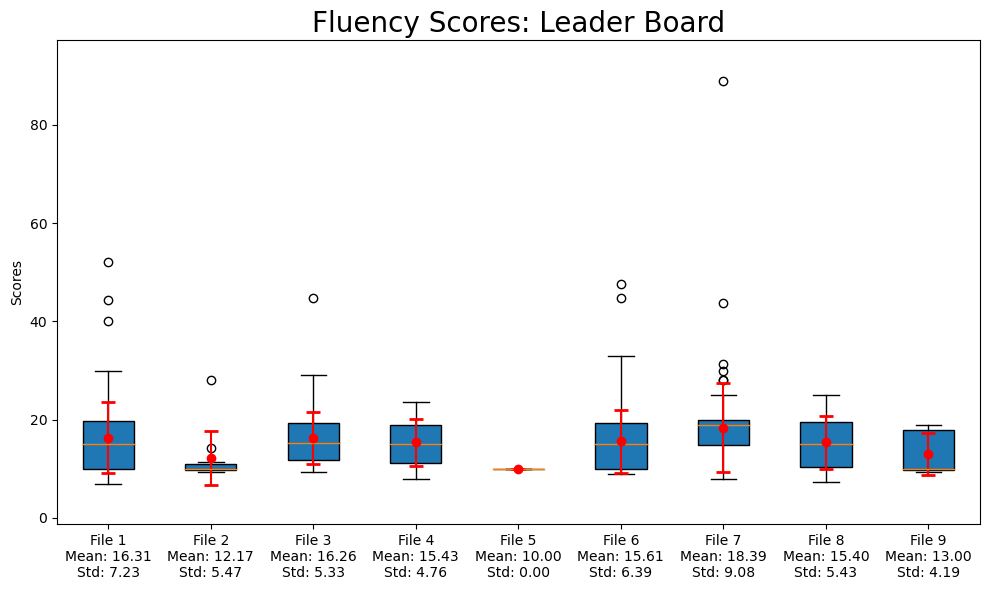

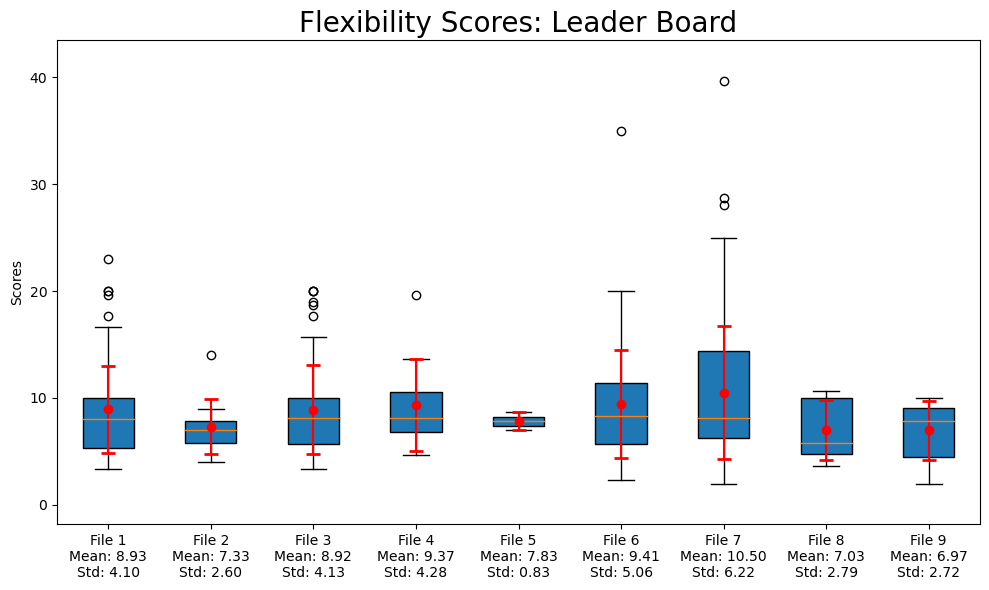

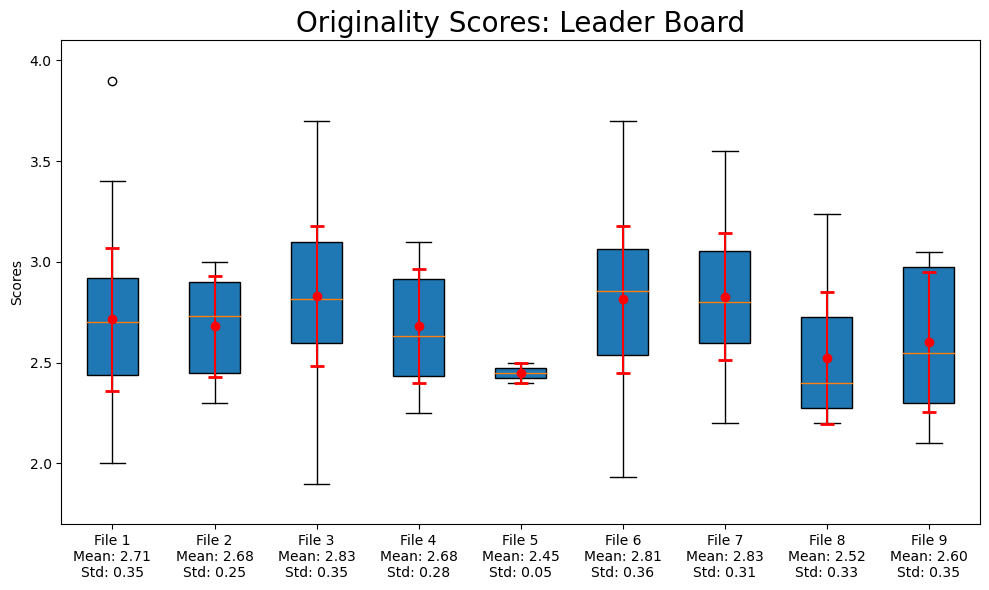

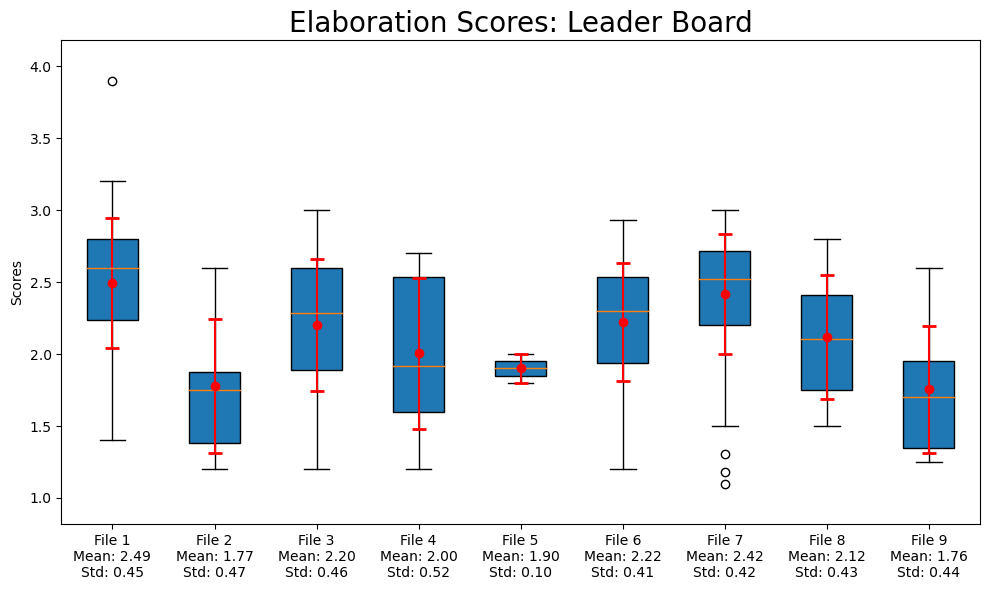

In [65]:
process_scores_folder(input_folder)

- Ignore the data out of 2.5 times of std

In [78]:
def plot_score(scores_by_file, category, dataset, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    data_to_plot = []

    # 计算每个文件的分数，只包括在两倍标准差之内的值
    for scores in scores_by_file:
        mean = np.mean(scores)
        std = np.std(scores)
        filtered_scores = [s for s in scores if (mean - 2.5*std) <= s <= (mean + 2.5*std)]
        data_to_plot.append(filtered_scores)

    means = [np.mean(scores) for scores in data_to_plot]
    stds = [np.std(scores) for scores in data_to_plot]

    bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)
    
    for i, (mean, std) in enumerate(zip(means, stds), start=1):
        ax.errorbar(i, mean, yerr=std, fmt='o', color='red', ecolor='red', capsize=5, capthick=2)
    
        # Set custom xtick labels with mean and std below each boxplot
    custom_xtick_labels = [f'File {i}\nMean: {mean:.2f}\nStd: {std:.2f}' for i, mean, std in zip(range(1, len(data_to_plot) + 1), means, stds)]
    ax.set_xticklabels(custom_xtick_labels, fontsize=10, ha='center')

    ax.set_title(f'{dataset} {category.capitalize()} Scores: {title}', fontsize=20)
    ax.set_ylabel('Scores')
    
    plt.tight_layout()
    plt.show()

# process_scores_folder(input_folder)


['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'CoT', '100-0', 'sampling', '3.json']
single_CoT_100-0
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'basic', '100-0', 'sampling', '3.json']
single_basic_100-0
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'deep-breath', '100-0', 'sampling', '3.json']
single_deep-breath_100-0
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'few-shot', '10-0', 'sampling', '3.json']
single_few-shot_10-0
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'CoT', '10-0', 'sampling', '3.json']
single_CoT_10-0
['../../Results/Instances/Eval', 'Result/single', 'agent/evaluation', 'Instances', 'Instances', 'single', 'few-shot', '100-0', 'sampling', '3.json']
single_few-shot_100-

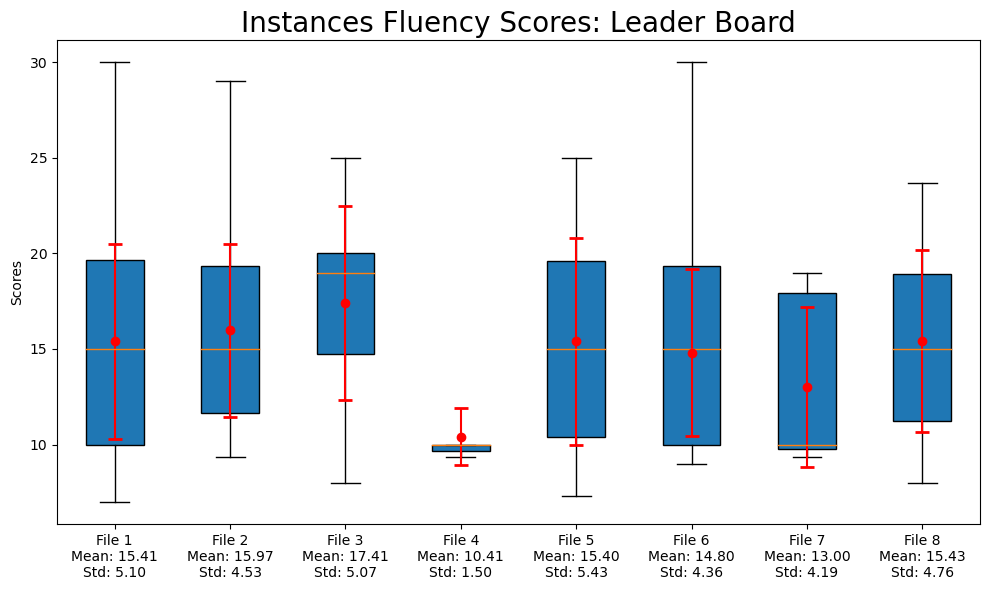

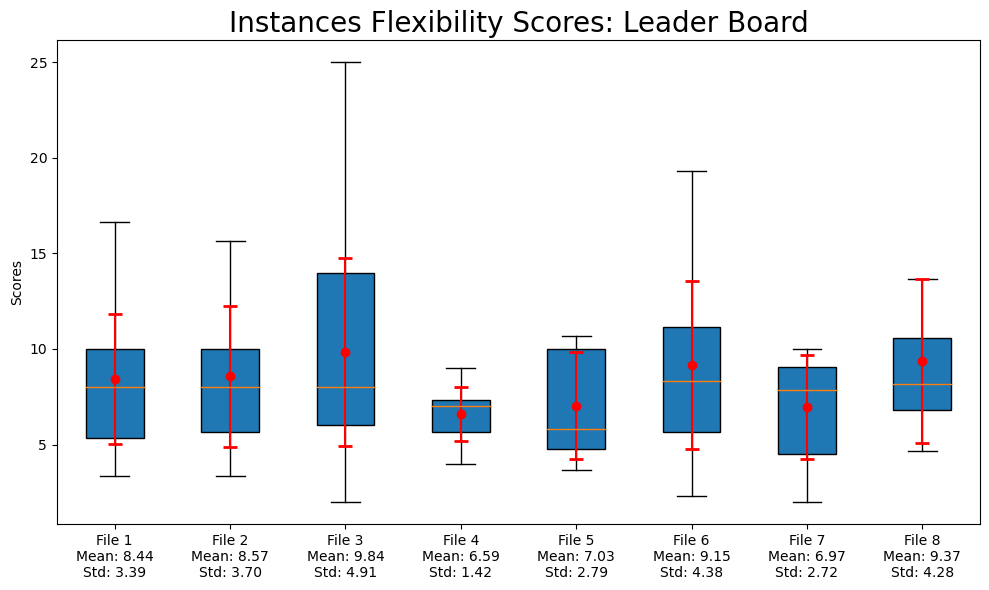

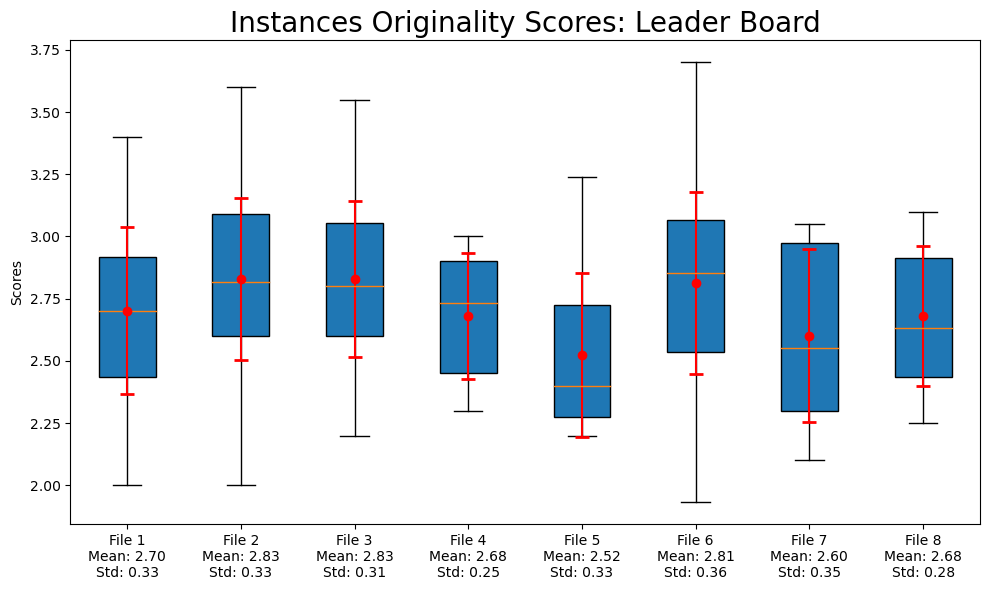

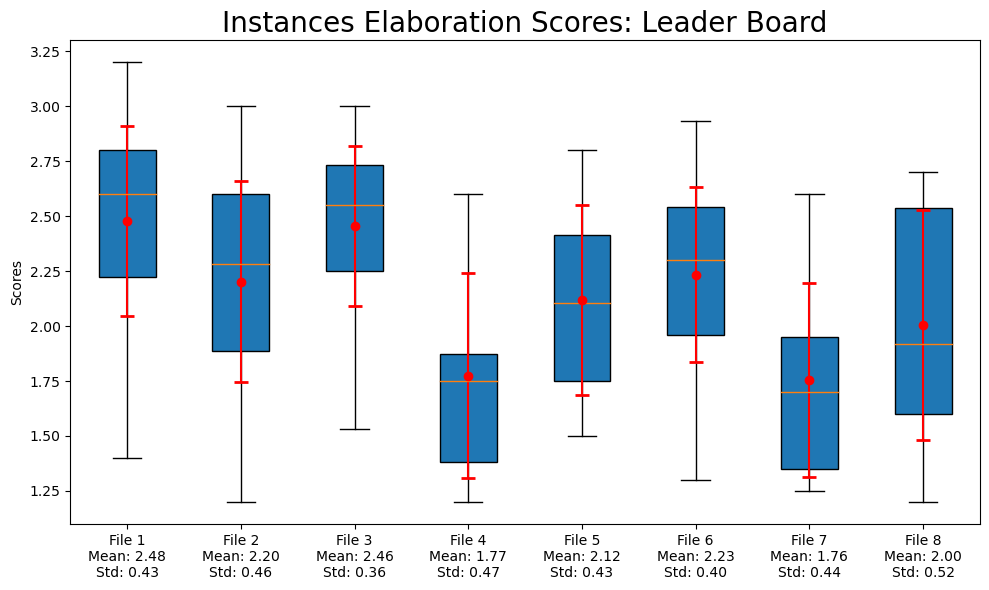

In [85]:
def process_scores_folder(input_folder):
    json_files = list(Path(input_folder).glob('*.json'))
    
    # 对于每个分数类别，将所有文件的分数收集到一个列表中
    all_scores = {category: [] for category in ['fluency', 'flexibility', 'originality', 'elaboration']}
    labels = list()
    
    for json_file in json_files:
        input_file_name_list = str(json_file).split('_')
        print(input_file_name_list)
        dataset = input_file_name_list[3]

        # label for temp test
        label = f"{input_file_name_list[5]}_{input_file_name_list[6]}_{input_file_name_list[7]}"
        print(label)
        labels.append(label)

        scores = calculate_scores(json_file)
        for category in all_scores.keys():
            all_scores[category].append(scores[category])

    print(labels)
    # 对每个分数类别，使用收集的分数画箱形图
    for category, scores_by_file in all_scores.items():
        plot_score(scores_by_file, category, dataset, title='Leader Board')

input_folder = '../../Results/Instances/Eval_Result/single_agent/'
# input_folder = '../../Results/Instances/Eval_Result/single_agent/round_test/'
process_scores_folder(input_folder)

In [5]:
def calculate_scores(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    score_categories = ['fluency', 'flexibility', 'originality', 'elaboration']
    scores_dict = {category: [] for category in score_categories}

    for item in data:
        for category in score_categories:
            if category in item:
                for score_item in item[category]:
                    if f'average_{category}' in score_item:
                        scores_dict[category].append(score_item[f'average_{category}'])

    return scores_dict

In [6]:
def process_scores_folder(input_folder):
    json_files = sorted(Path(input_folder).glob('*.json'), key=lambda x: str(x))

    all_scores = {category: [] for category in ['fluency', 'flexibility', 'originality', 'elaboration']}
    labels = []

    for json_file in json_files:
        input_file_name_list = str(json_file.stem).split('_')  # Use stem to get filename without suffix
        # print(input_file_name_list)
        dataset = input_file_name_list[2]
        label = f"{input_file_name_list[3]}_{input_file_name_list[4]}_{input_file_name_list[5]}"
        labels.append(label)
        scores = calculate_scores(json_file)
        for category in all_scores.keys():
            all_scores[category].append(scores[category])
    # print(labels)
    # Plotting for each score category with the labels list
    for category, scores_by_file in all_scores.items():
        plot_score(scores_by_file, category, dataset, labels, title='Leader Board')


input_folder = '../../Results/Instances/Eval_Result/single_agent/'
# input_folder = '../../Results/Instances/Eval_Result/single_agent/round_test/'
# process_scores_folder(input_folder)

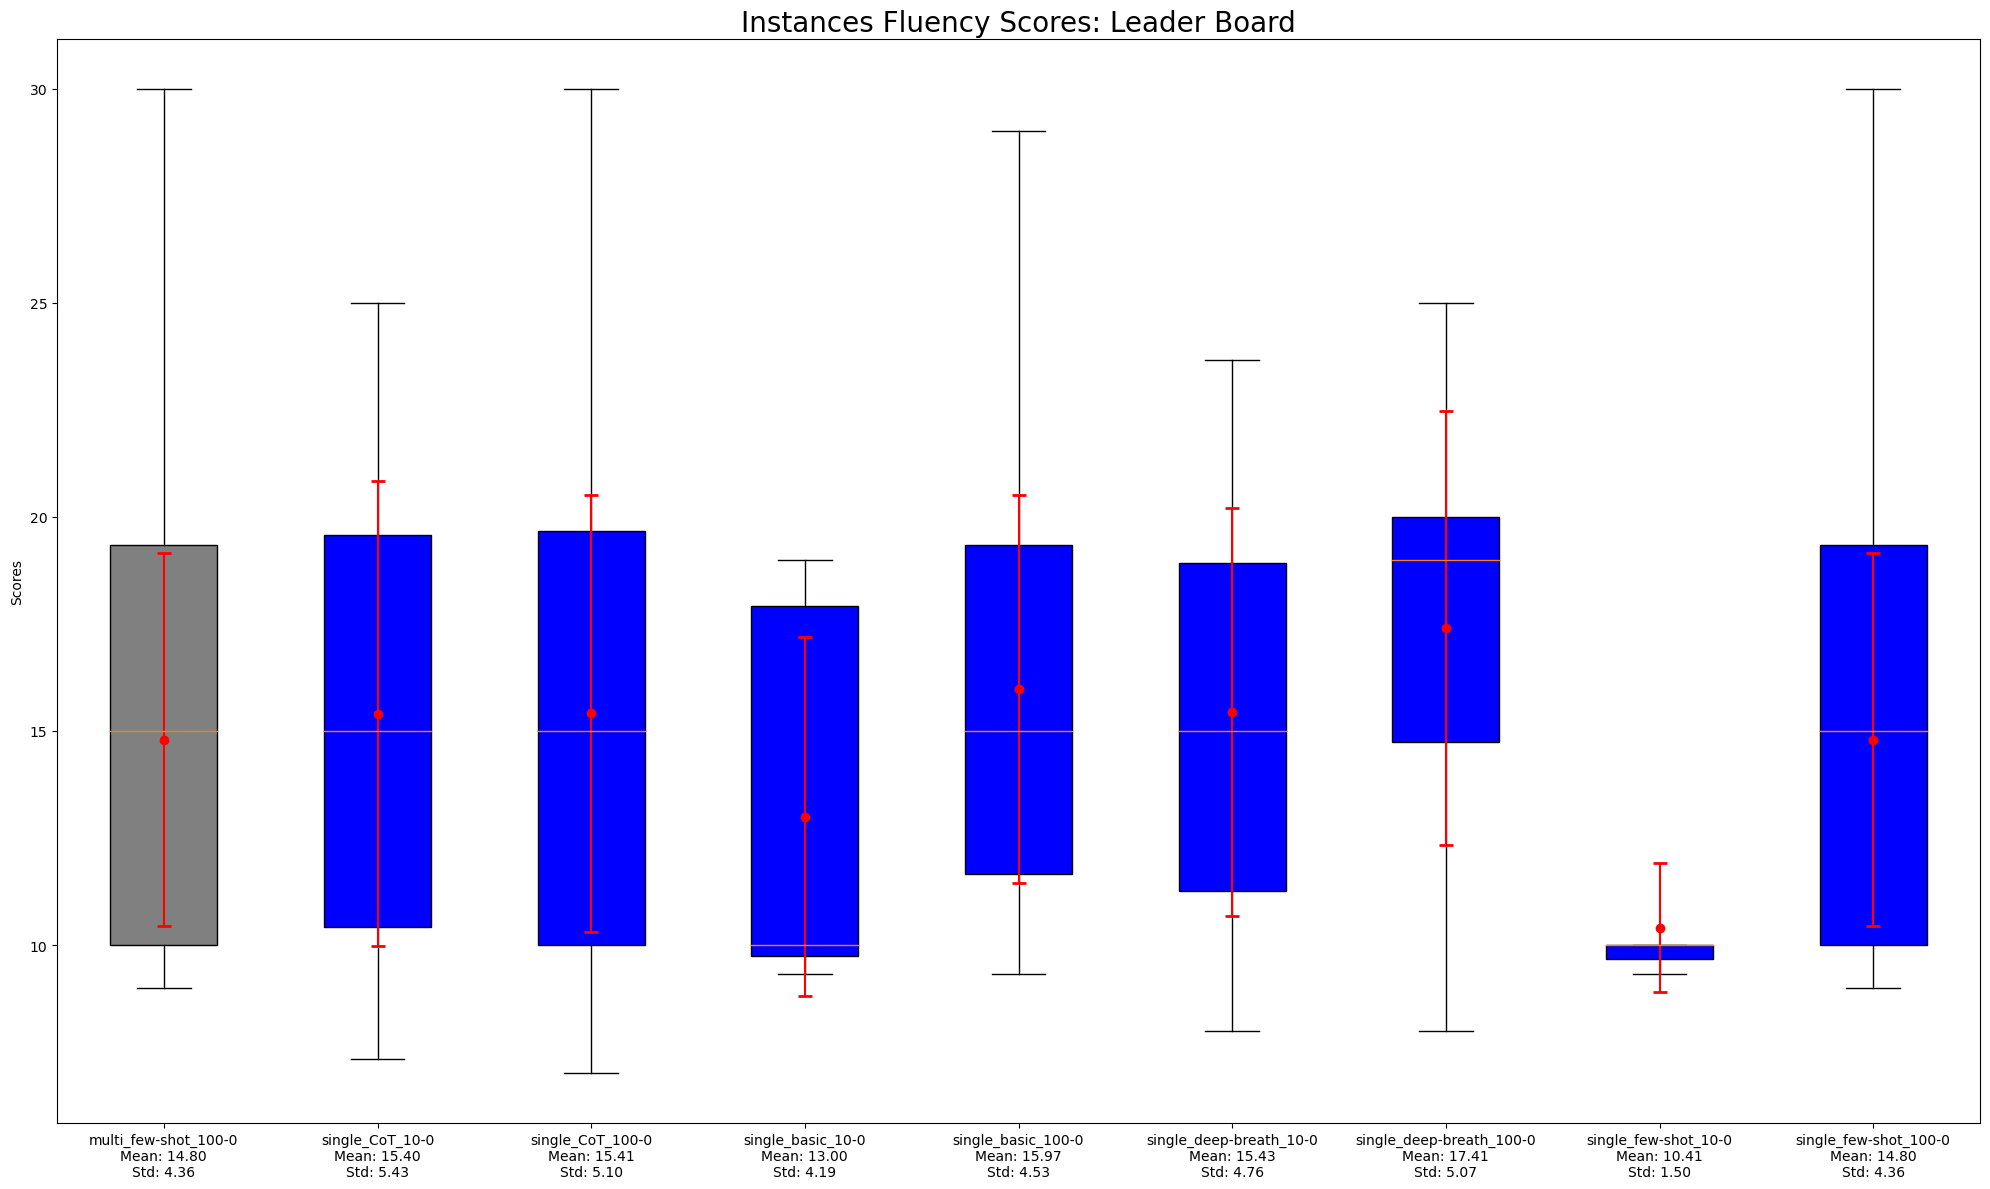

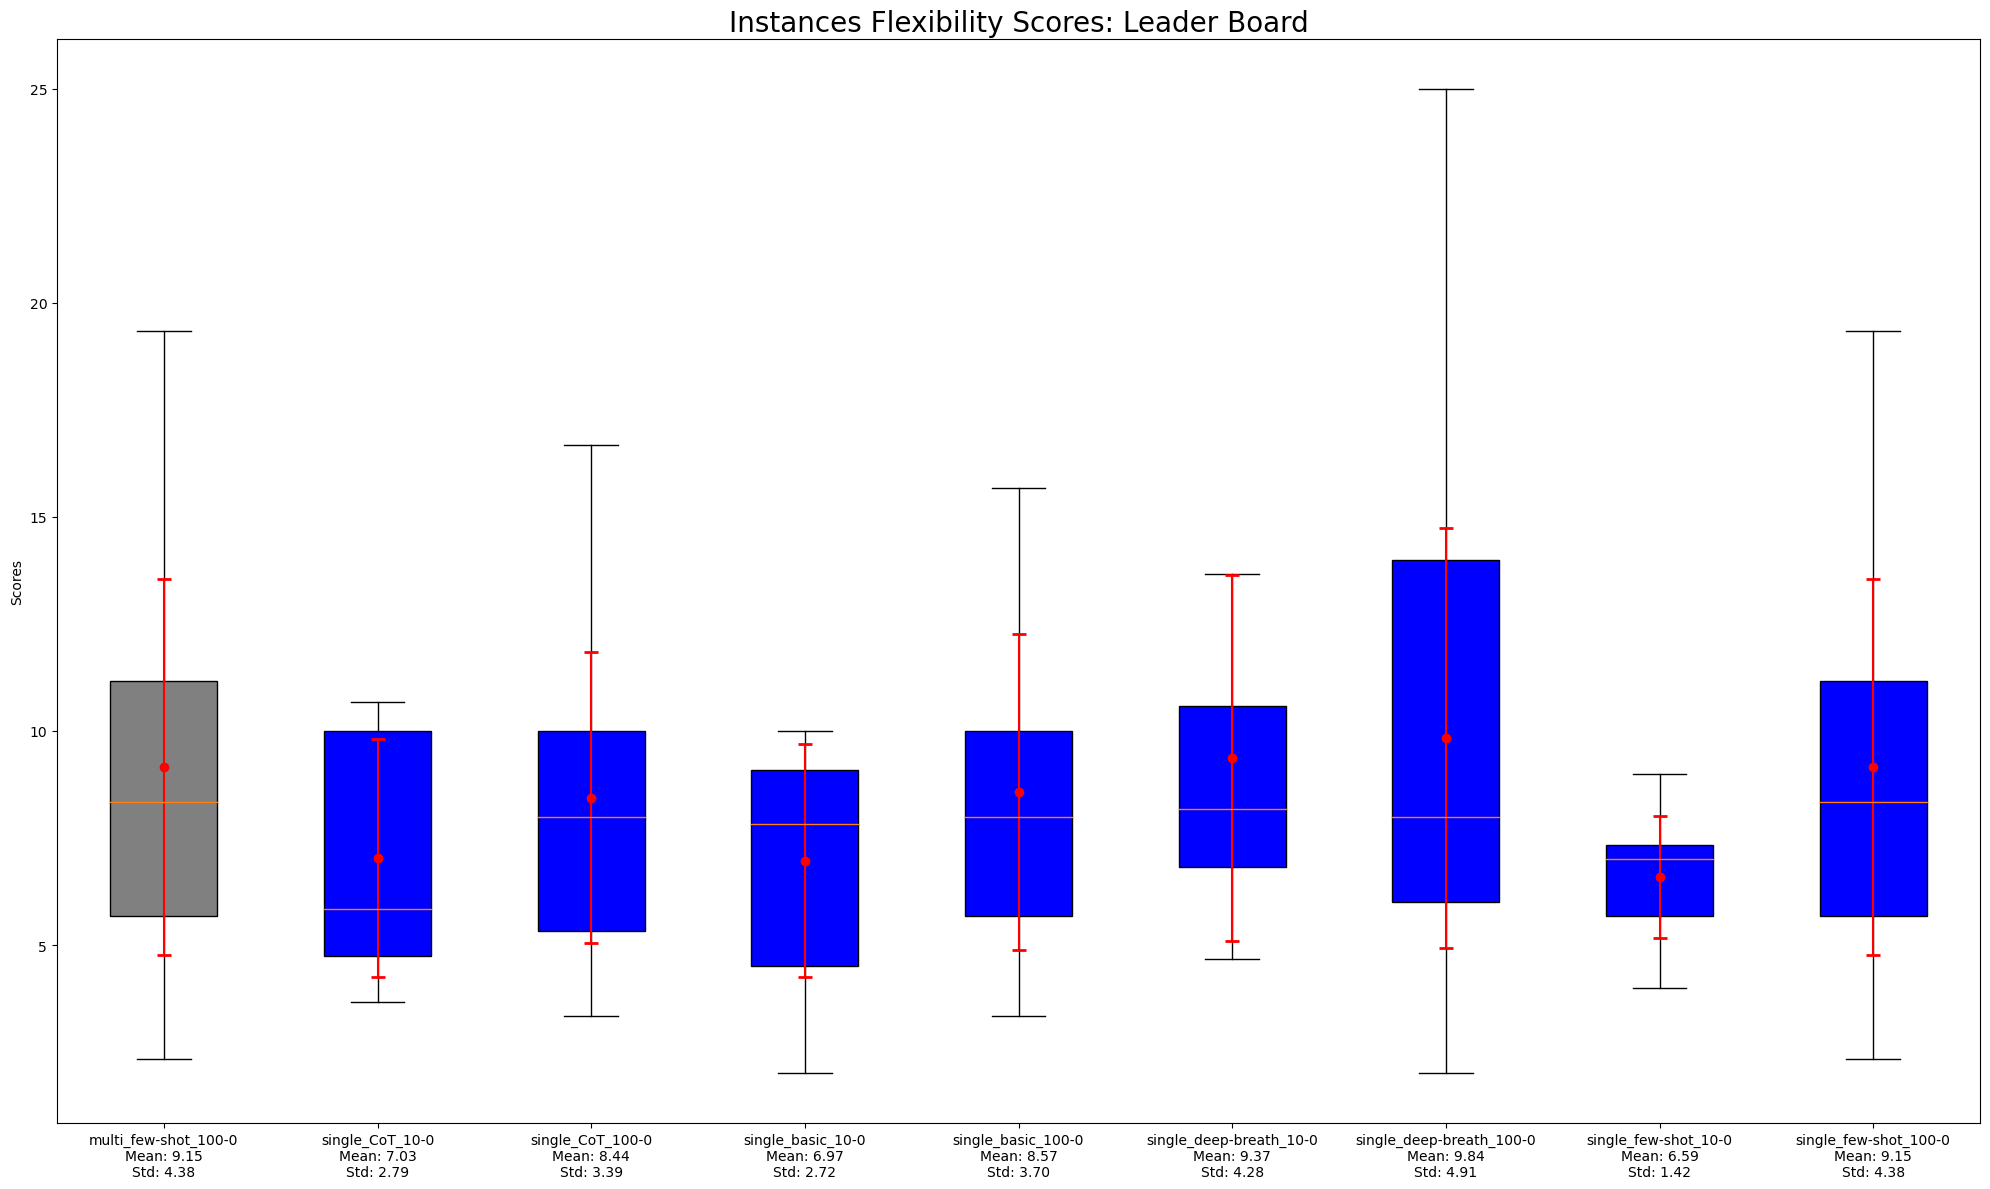

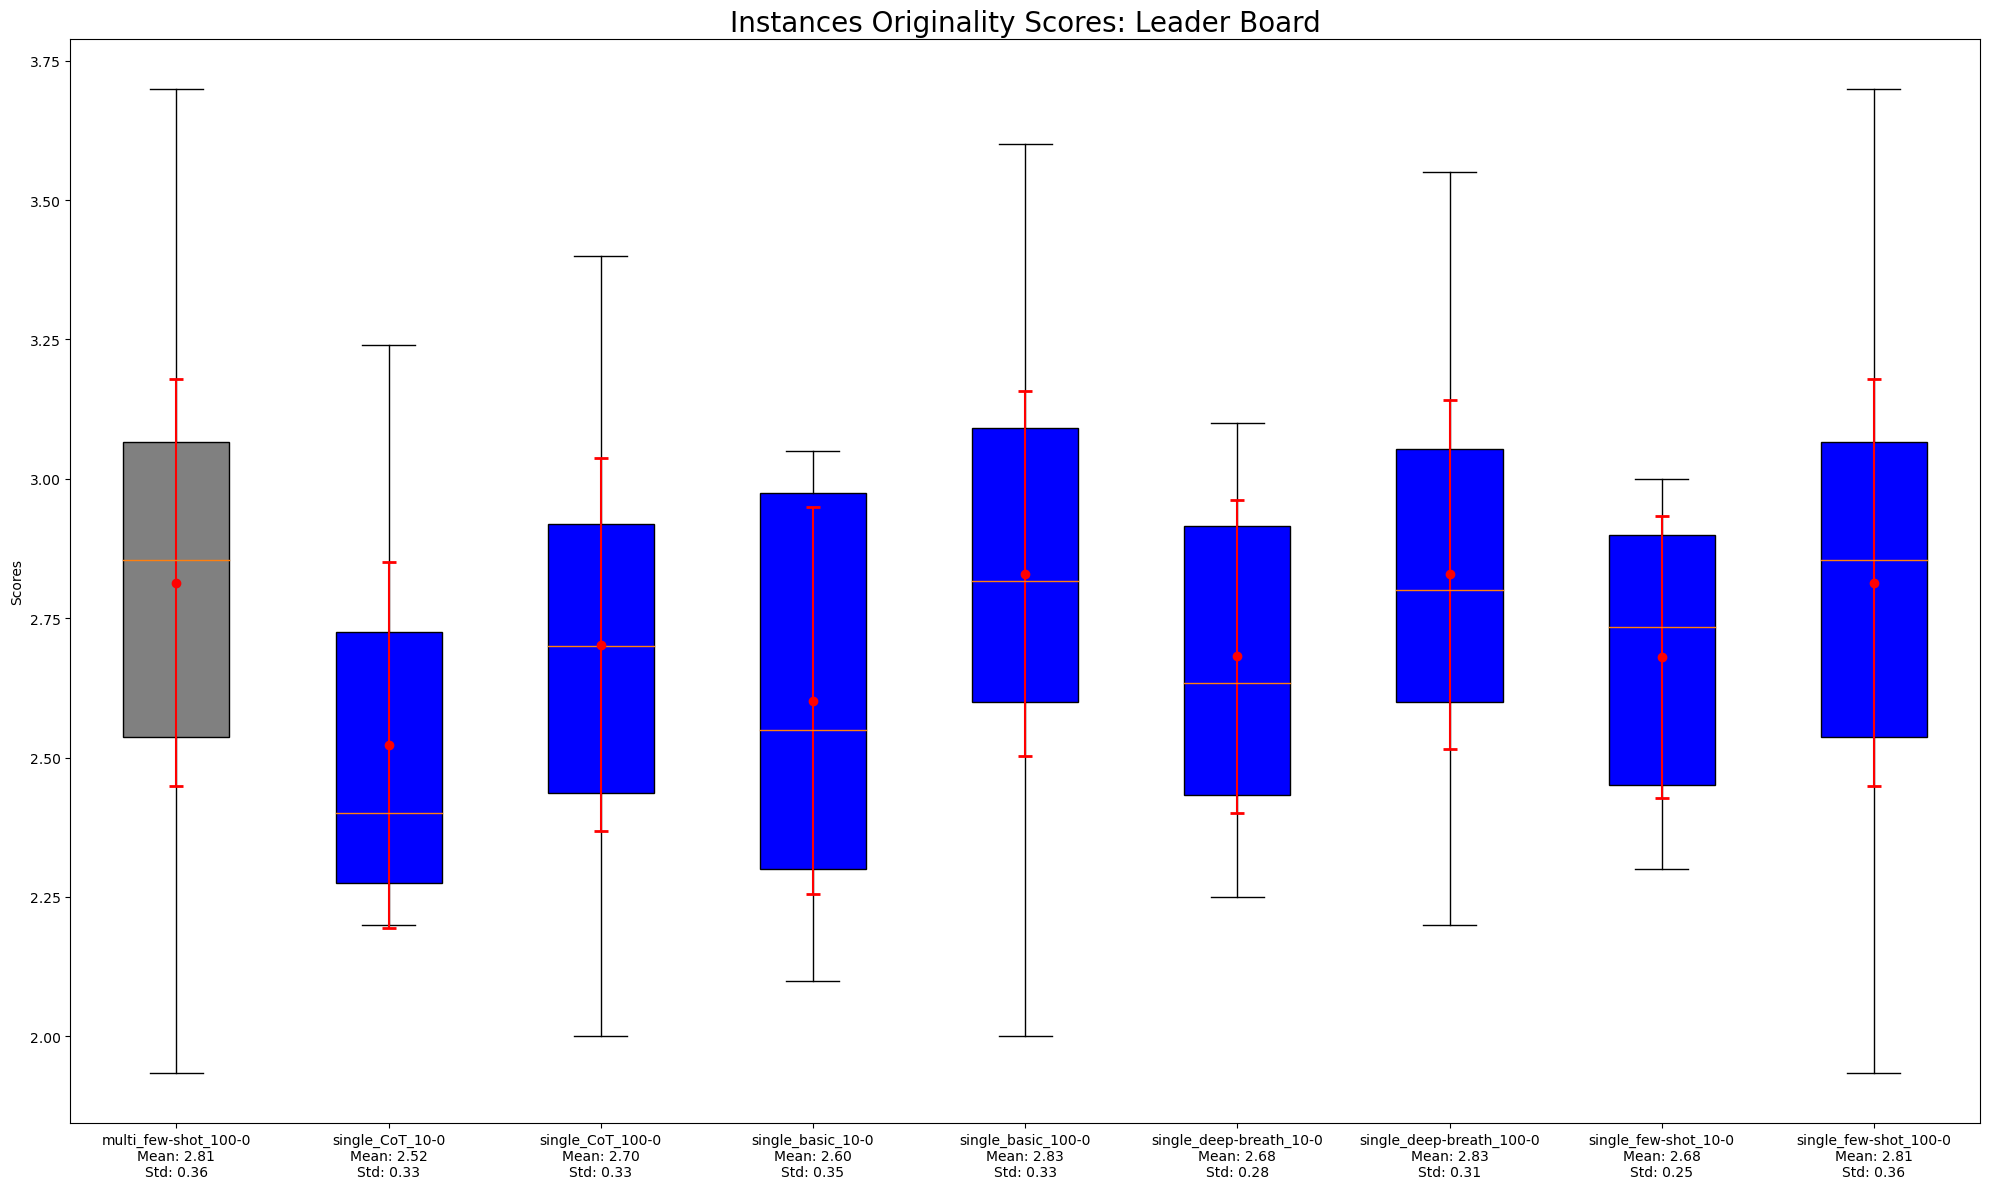

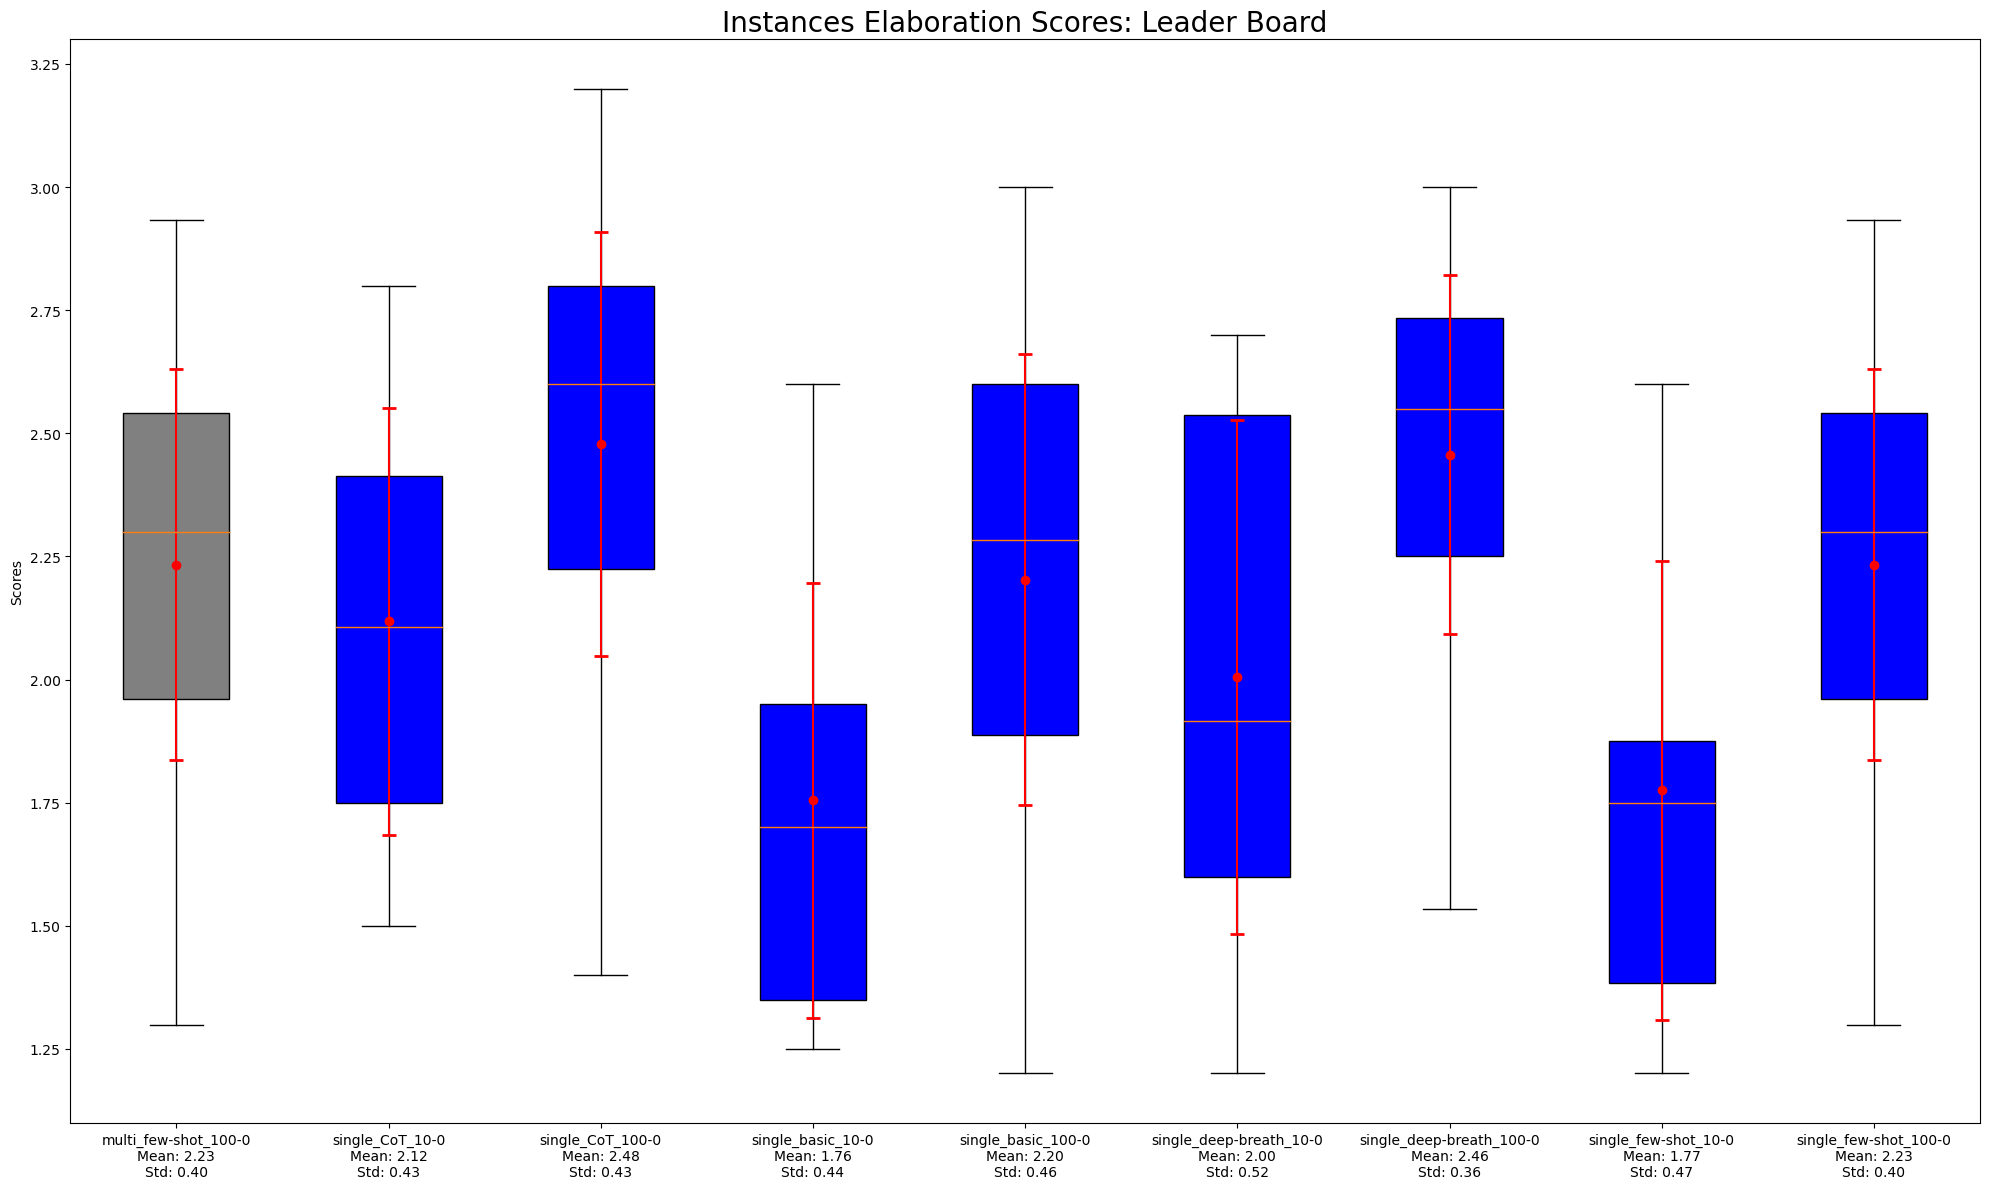

In [102]:
def plot_score(scores_by_file, category, dataset, x_labels, title=None):
    fig, ax = plt.subplots(figsize=(20, 12))
    data_to_plot = []

    # 计算每个文件的分数，只包括在两倍标准差之内的值
    for scores in scores_by_file:
        mean = np.mean(scores)
        std = np.std(scores)
        filtered_scores = [s for s in scores if (mean - 2.5*std) <= s <= (mean + 2.5*std)]
        data_to_plot.append(filtered_scores)

    means = [np.mean(scores) for scores in data_to_plot]
    stds = [np.std(scores) for scores in data_to_plot]

    # bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)
    # Boxplot with conditional coloring
    box_colors = ['grey' if 'multi' in label.split('_')[0] else 'blue' for label in x_labels]
    bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)

    # Apply colors to boxes based on condition
    for box, color in zip(bp['boxes'], box_colors):
        box.set_facecolor(color)
    
    for i, (mean, std) in enumerate(zip(means, stds), start=1):
        ax.errorbar(i, mean, yerr=std, fmt='o', color='red', ecolor='red', capsize=5, capthick=2)
    
        # Set custom xtick labels with mean and std below each boxplot
    custom_xtick_labels = [f'{label}\nMean: {mean:.2f}\nStd: {std:.2f}' for label, mean, std in zip(x_labels, means, stds)]
    ax.set_xticklabels(custom_xtick_labels, fontsize=10, ha='center')
    # ax.set_xticklabels(x_labels, fontsize=12, ha='center')

    ax.set_title(f'{dataset} {category.capitalize()} Scores: {title}', fontsize=20)
    ax.set_ylabel('Scores')
    
    plt.tight_layout()
    plt.show()

process_scores_folder(input_folder)


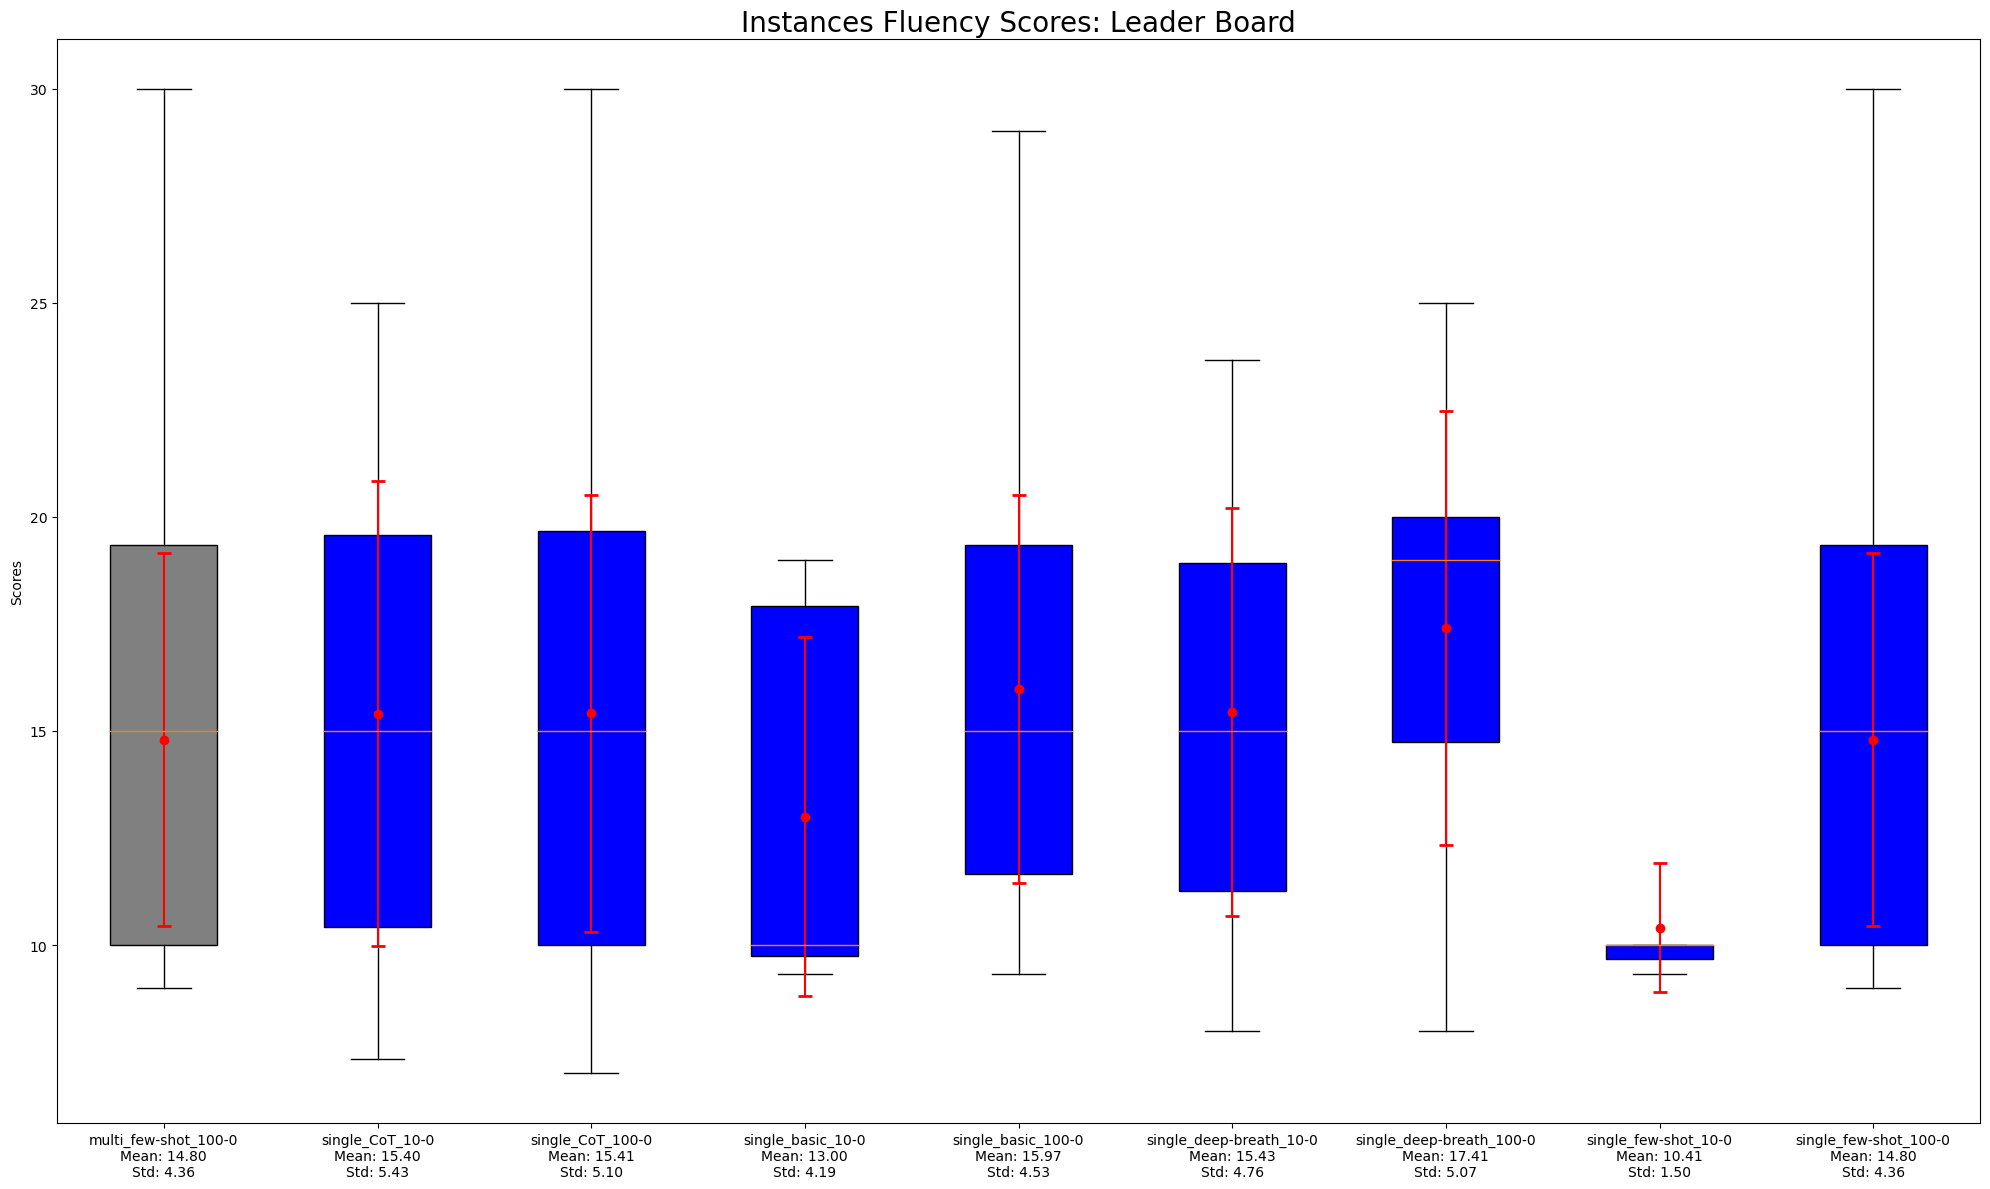

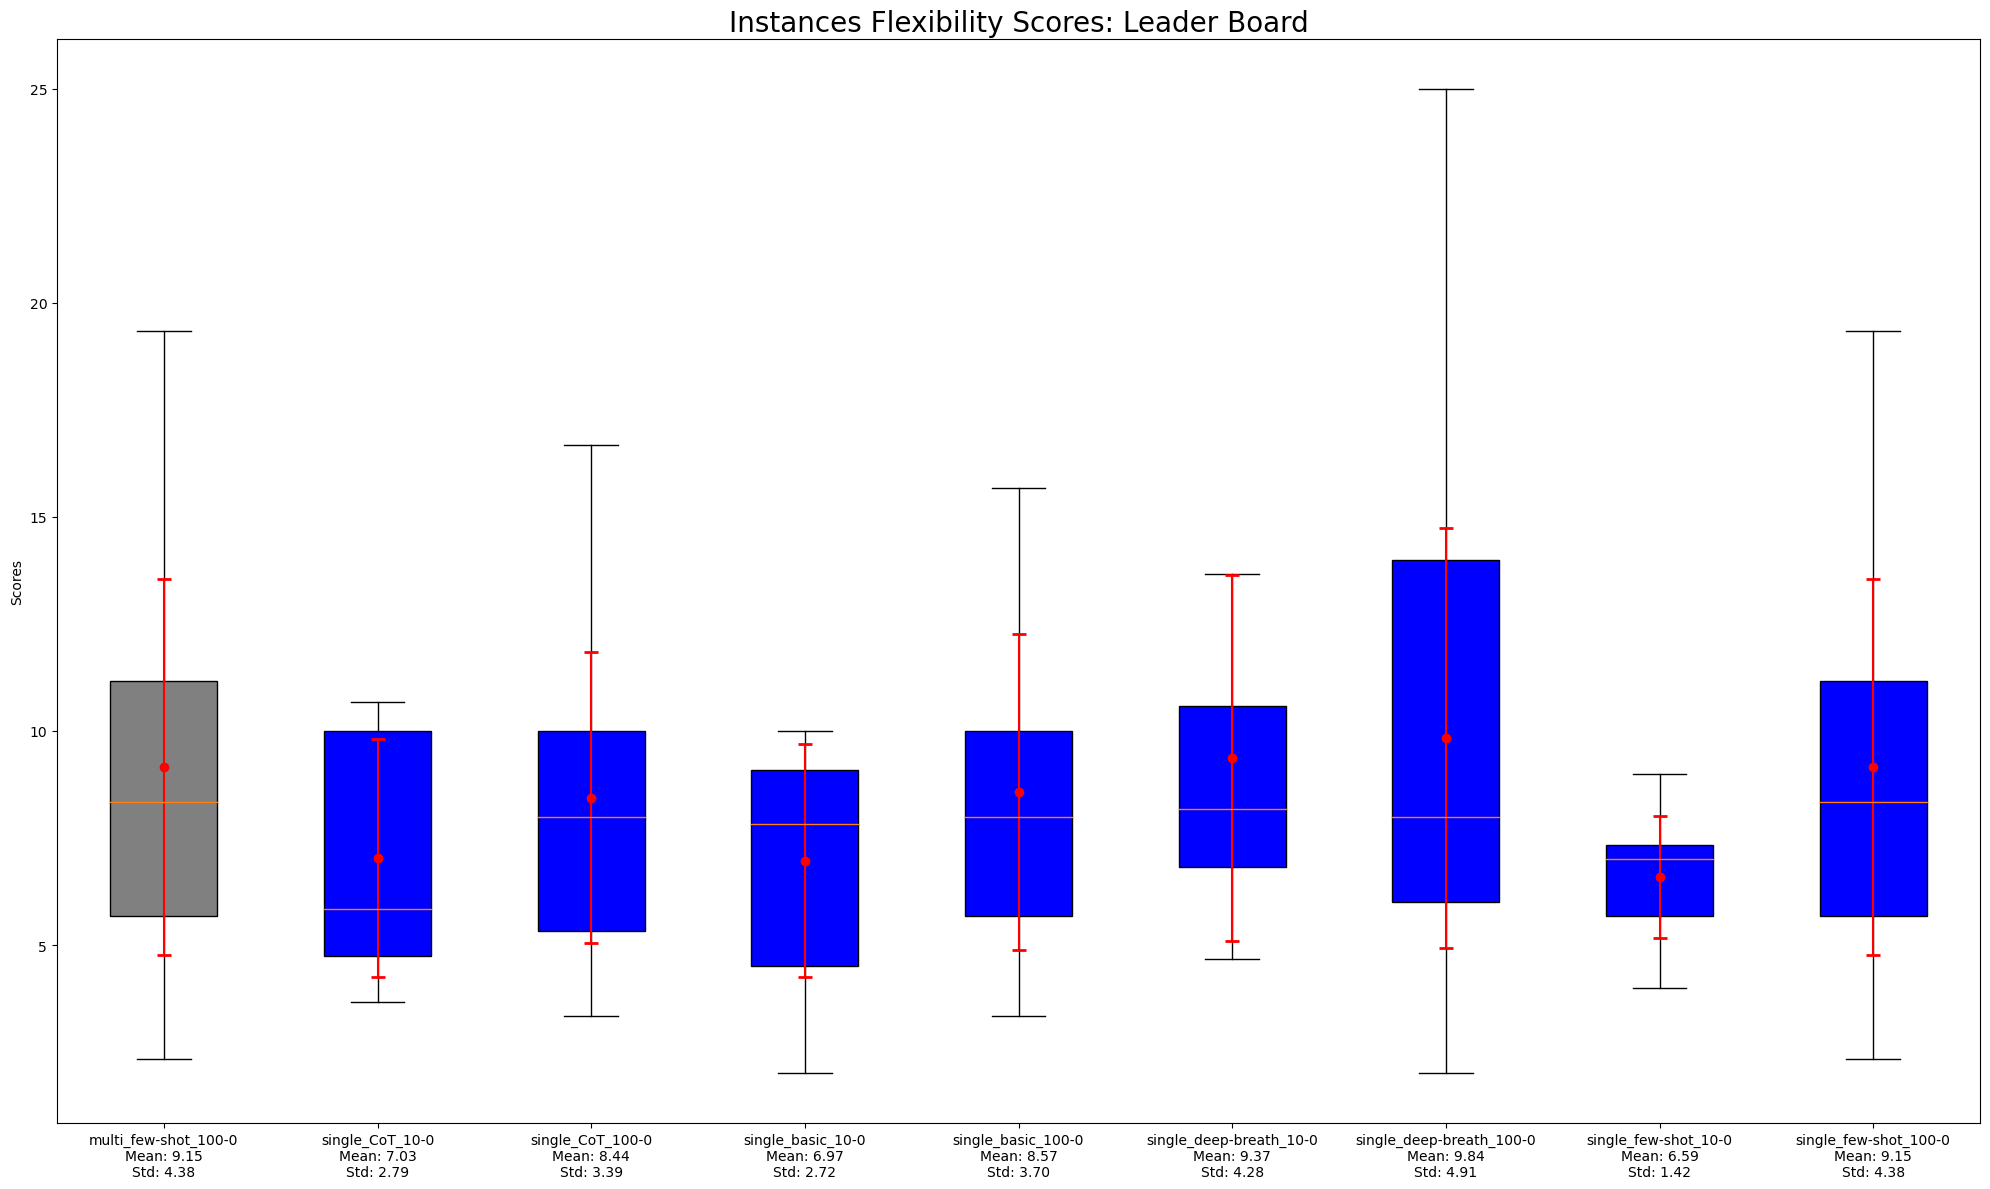

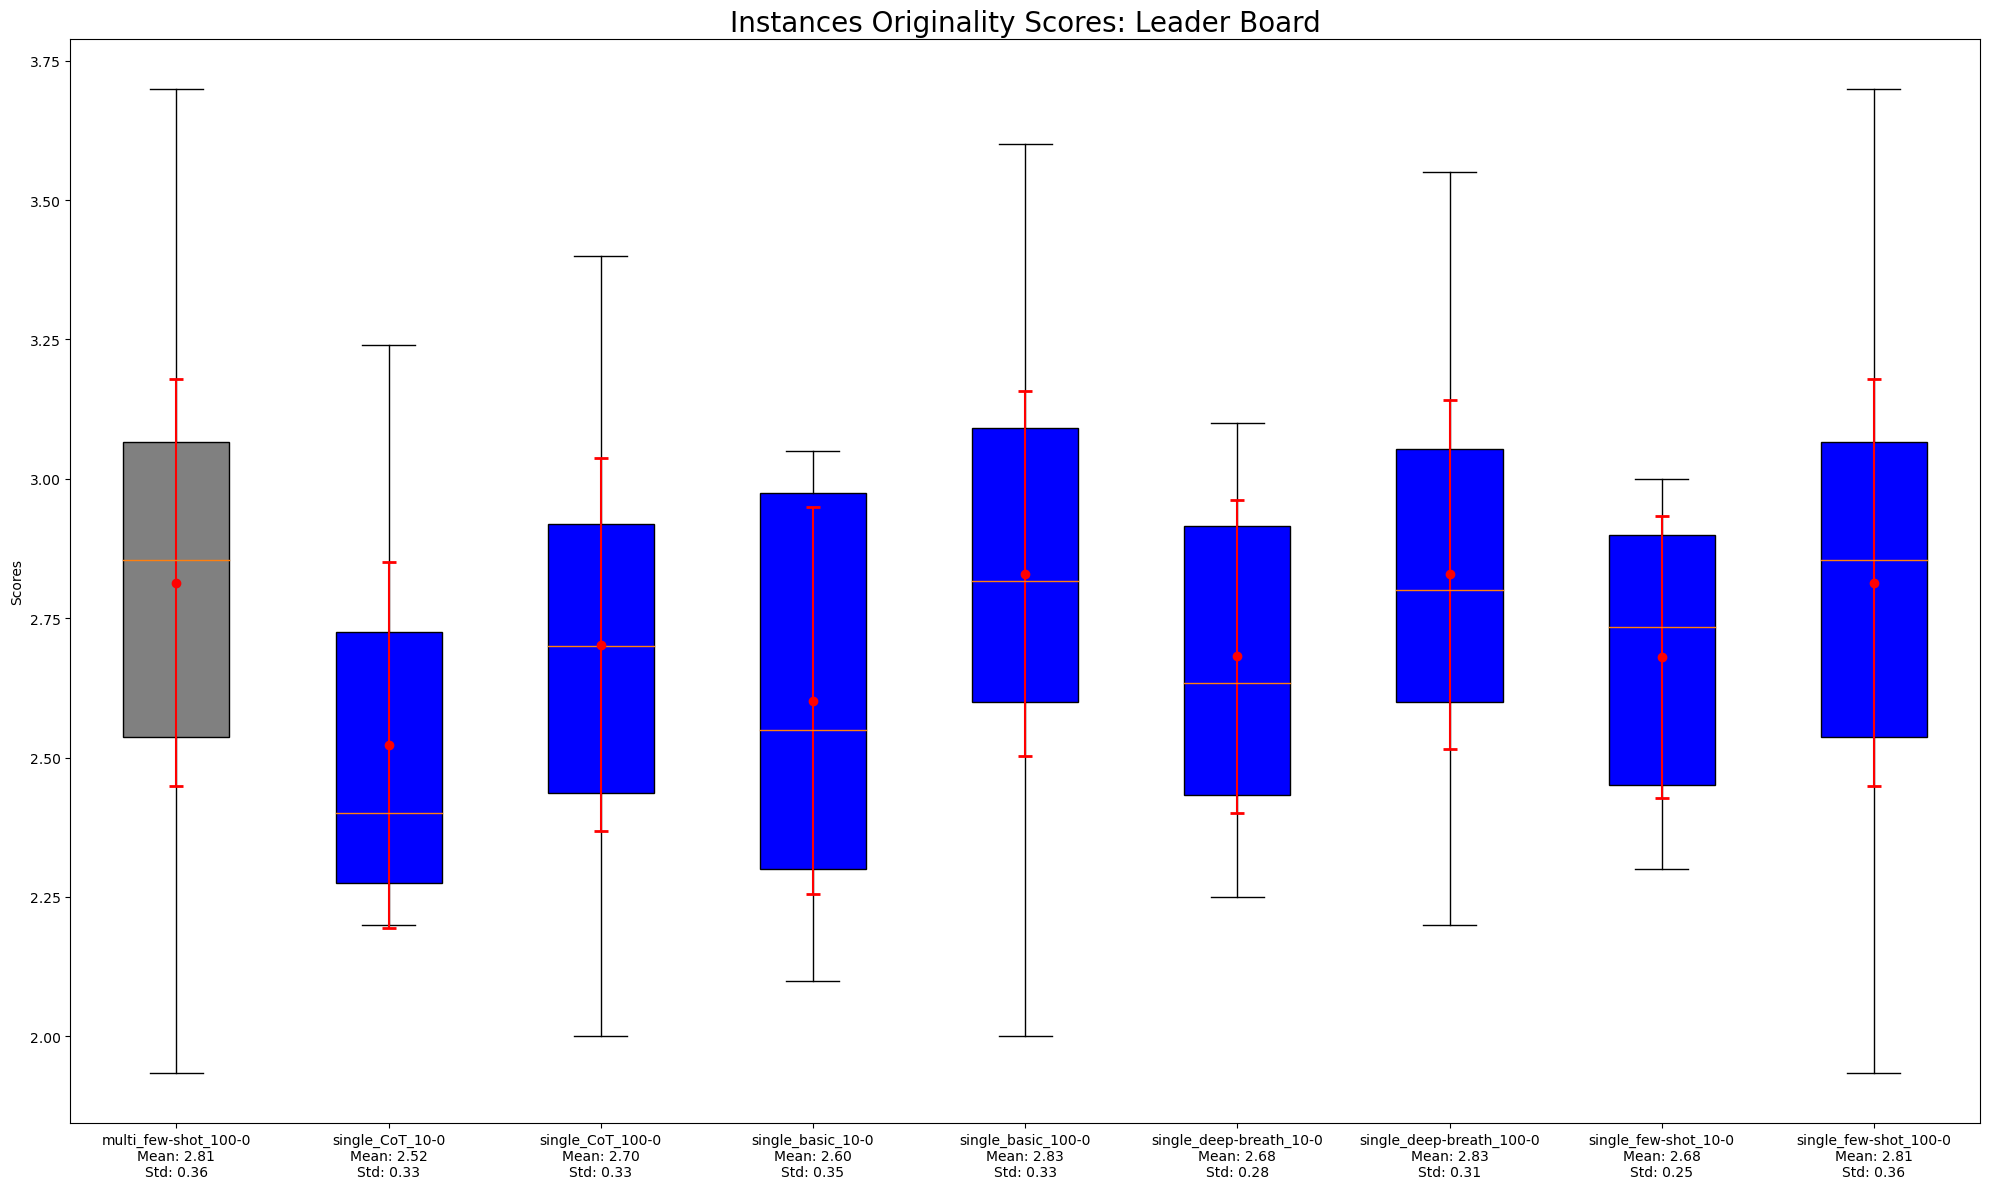

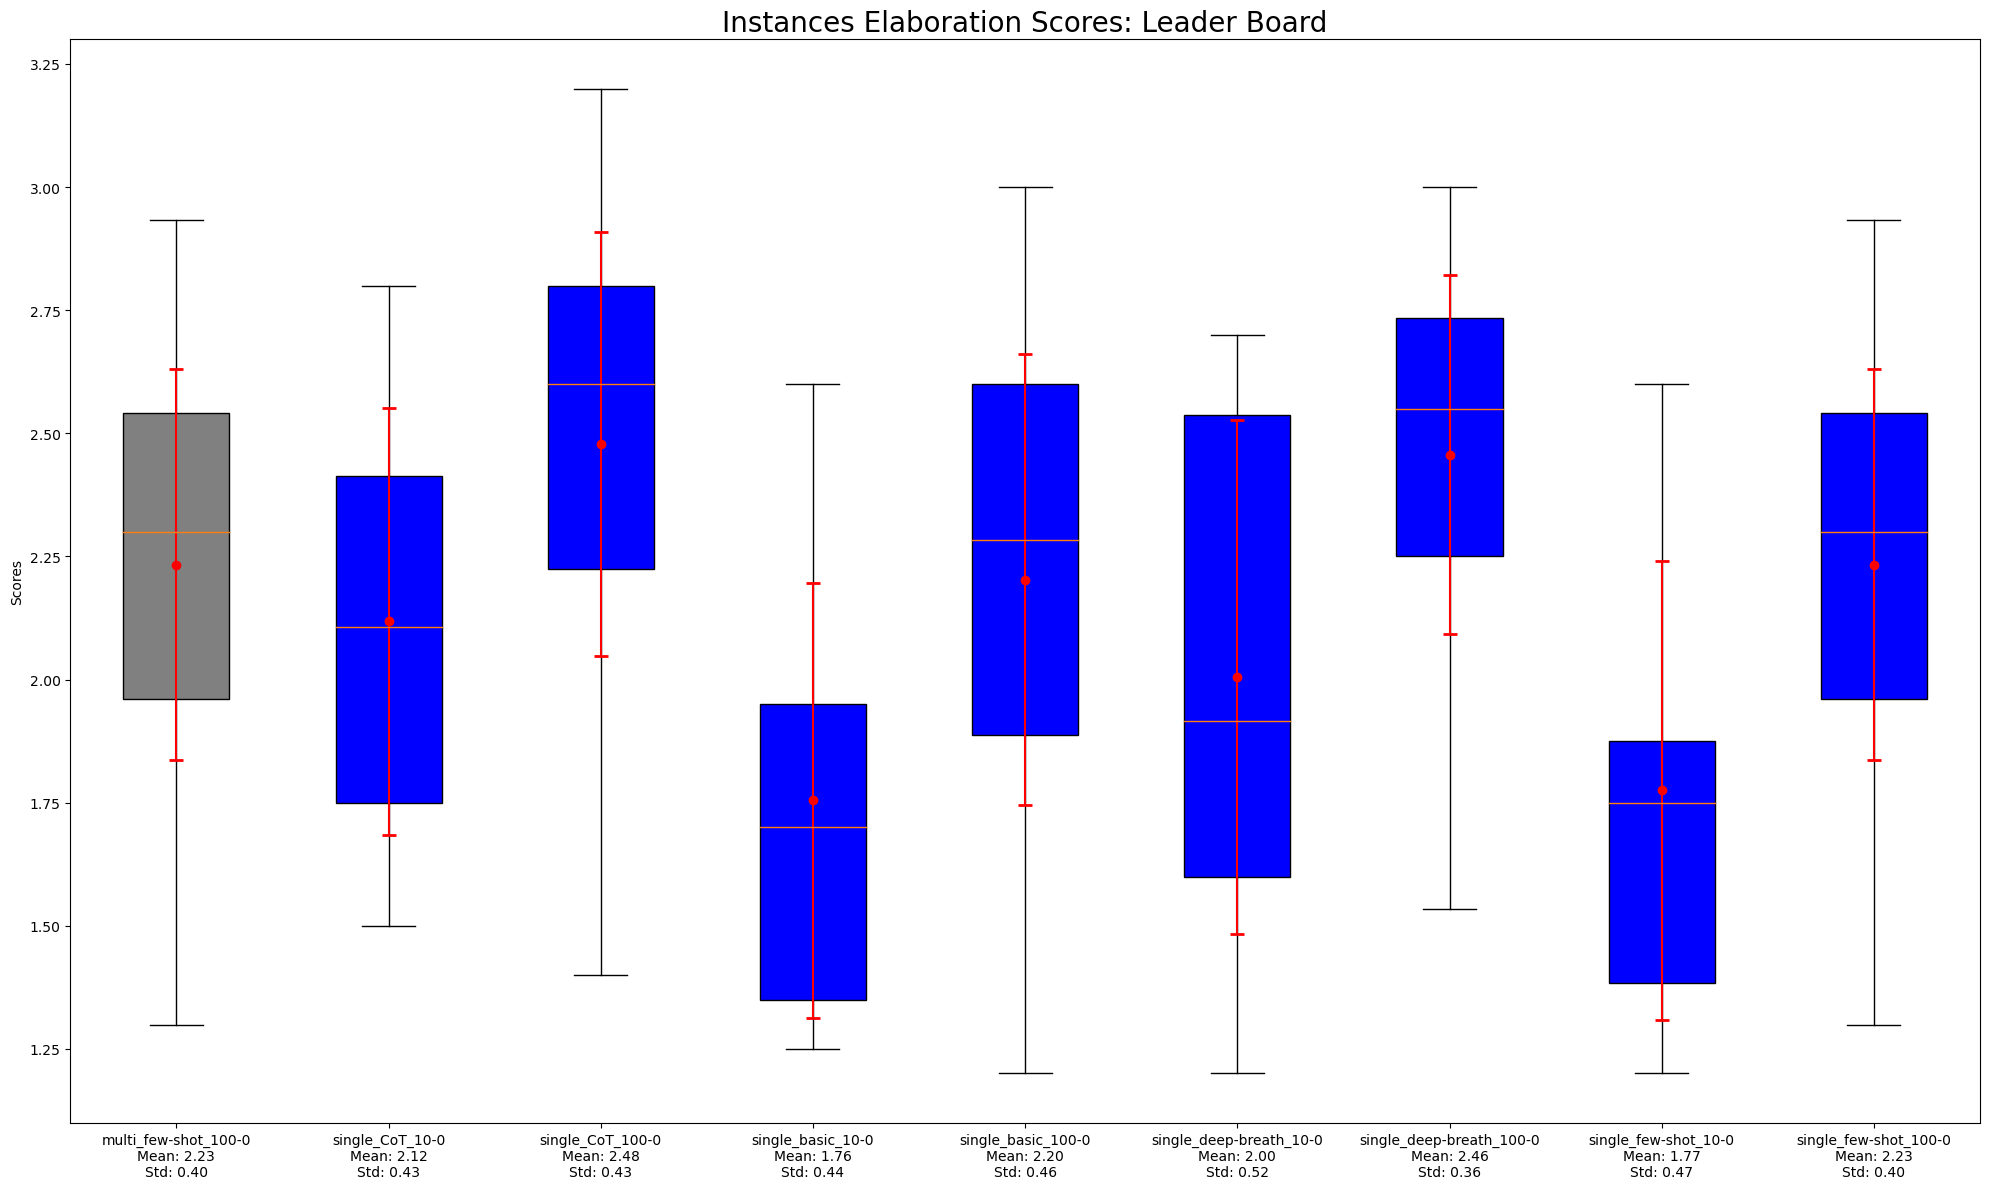

In [7]:
def plot_score(scores_by_file, category, dataset, x_labels, title=None):
    fig, ax = plt.subplots(figsize=(20, 12))
    data_to_plot = []

    # 计算每个文件的分数，只包括在两倍标准差之内的值
    for scores in scores_by_file:
        mean = np.mean(scores)
        std = np.std(scores)
        filtered_scores = [s for s in scores if (mean - 2.5*std) <= s <= (mean + 2.5*std)]
        data_to_plot.append(filtered_scores)

    means = [np.mean(scores) for scores in data_to_plot]
    stds = [np.std(scores) for scores in data_to_plot]

    # bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)
    # Boxplot with conditional coloring
    box_colors = ['grey' if 'multi' in label.split('_')[0] else 'blue' for label in x_labels]
    bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)

    # Apply colors to boxes based on condition
    for box, color in zip(bp['boxes'], box_colors):
        box.set_facecolor(color)
    
    for i, (mean, std) in enumerate(zip(means, stds), start=1):
        ax.errorbar(i, mean, yerr=std, fmt='o', color='red', ecolor='red', capsize=5, capthick=2)
    
        # Set custom xtick labels with mean and std below each boxplot
    custom_xtick_labels = [f'{label}\nMean: {mean:.2f}\nStd: {std:.2f}' for label, mean, std in zip(x_labels, means, stds)]
    ax.set_xticklabels(custom_xtick_labels, fontsize=10, ha='center')
    # ax.set_xticklabels(x_labels, fontsize=12, ha='center')

    ax.set_title(f'{dataset} {category.capitalize()} Scores: {title}', fontsize=20)
    ax.set_ylabel('Scores')
    
    plt.tight_layout()
    plt.show()

process_scores_folder(input_folder)
